In [284]:
using Images
using Statistics
using PythonPlot
using DSP
using StatsBase
using VectorizedStatistics
using ImageMorphology
using HypothesisTests
mpl = PythonPlot.pyimport("matplotlib")
mpl.rcParams["svg.fonttype"] = "none"

"none"

In [2]:
function mask_site(file, threshold; n_sites=1)
    img = load(file)
    im_array = Float64.(img) * 65535 # concert to 16bit
    # Don't do frame averaging. Was found not neccessary for images used. 
    # Use stack standard dev projection to find polarity patch(es)
    img_std = std(im_array, dims=(3))[:,:,1]
    max_bin = 0
    bin = img_std .> maximum(img_std)*threshold
    bin = dilate(bin, r=1)
    bin_lab = label_components(bin)
    masks = zeros(size(im_array)[1], size(im_array)[2], size(im_array)[3], n_sites)
    for i in range(1,n_sites)
        bin = bin .- max_bin         
        max_loc = findmax(bin.*img_std)[2]          # mask the image. find the max. get the coords.
        max_lab = bin_lab[max_loc]                  # get label in labeled mask from coords
        max_bin = bin_lab .== max_lab               # Make binary mask only around correct component
        im_masked = im_array .* max_bin 
        masks[:,:,:,i] = im_masked
    end
    return masks
end

mask_site (generic function with 1 method)

In [3]:
# Modified for mutli-signal to return times instead of time-crops
function crop_times(signal, frames, thresh)
    signal=signal.-minimum(signal)
    start = Integer(findall(signal .> ((maximum(signal))*thresh))[1])
    if start + frames < length(signal)
        times = start:start+Integer(frames)
        return times
    else 
        last = length(signal)
        times = last-Integer(frames):last
        print(".")
        return times
    end
end

crop_times (generic function with 1 method)

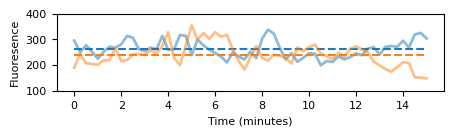

In [236]:
file = "../data/2024_09_26-3XGBwt/2patch/movie1-cell7.tif"
file = "../data/2024_09_26-3XGBwt/2patch/movie1-cell8.tif"
#file = "../data/2024_09_26-3XGBwt/2patch/movie1-cell10.tif"


interval = 15
time_threshold=0.5
masks = mask_site(file, 0.3, n_sites=2);
im_size = length(masks[:,1,1,1])*length(masks[1,:,1,1])
m1 = masks[:,:,:,1]
m2 = masks[:,:,:,2]
q1 = maximum(m1, dims=(1,2))[1,1,:]
q2 = maximum(m2, dims=(1,2))[1,1,:]
times_max1 = crop_times(q1, 15*(60/interval), time_threshold)
times_max2 = crop_times(q2, 15*(60/interval), time_threshold)
crop1 = q1[max(times_max1, times_max2)]
crop2 = q2[max(times_max1, times_max2)]
t = range(0,60/15*15)*(15/60) # Convert from 1 frame every 5 sec, to minutes

fig, ax = subplots(figsize=(5,1))
ax.plot(t, crop1, linewidth=2, color="C0", alpha=0.5)
ax.hlines(mean(crop1),0,15, ls="--")
ax.plot(t, crop2, linewidth=2, color="C1", alpha=0.5)
ax.hlines(mean(crop2),0,15, ls="--", color="C1")
ax.set_ylabel("Fluoresence", fontsize=8)
ax.set_xlabel("Time (minutes)", fontsize=8)
ax.tick_params(labelsize=8)
ax.set_ylim(100,400)

savefig("../figures/3xGB_trace_wt_m1c8.svg")
display(gcf())


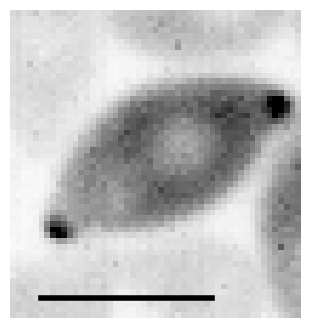

Python: None

In [230]:
frames = max(times_max1, times_max2)
img = load(file)
im_array = Float64.(img) * 65535
fig, ax = subplots(figsize=(4,4))
sblen = 6.15*5
plot(range(5,5+sblen), ones(Int(round(sblen))).*50, color="black", linewidth=4) #5um scalebar
imshow(mean(im_array[:,:,frames], dims=(3)), cmap="Greys", clim=(100,200))
ax.set_axis_off()
display(gcf())
savefig("../figures/3xGB_heatmap_wt_m1c8.svg", transparent=true)

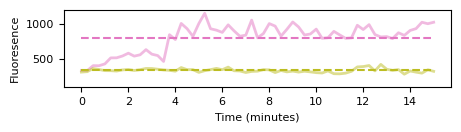

.

In [231]:
file = "../data/2024_09_26-3XGBpak1Del/2patch/movie12-cell3.tif"
file = "../data/2024_09_26-3XGBpak1Del/2patch/movie12-cell8.tif"
#file = "../data/2024_09_26-3XGBpak1Del/2patch/movie7-cell3.tif"
interval = 15
time_threshold=0.5
masks = mask_site(file, 0.3, n_sites=2);
im_size = length(masks[:,1,1,1])*length(masks[1,:,1,1])
m1 = masks[:,:,:,1]
m2 = masks[:,:,:,2]
q1 = maximum(m1, dims=(1,2))[1,1,:]
q2 = maximum(m2, dims=(1,2))[1,1,:]
times_max1 = crop_times(q1, 15*(60/interval), time_threshold)
times_max2 = crop_times(q2, 15*(60/interval), time_threshold)
crop1 = q1[max(times_max1, times_max2)]
crop2 = q2[max(times_max1, times_max2)]
t = range(0,60/15*15)*(15/60) # Convert from 1 frame every 5 sec, to minutes

fig, ax = subplots(figsize=(5,1))
ax.plot(t, crop1, linewidth=2, color="C6", alpha=0.5)
ax.hlines(mean(crop1),0,15, ls="--", color="C6")
ax.plot(t, crop2, linewidth=2, color="C8", alpha=0.5)
ax.hlines(mean(crop2),0,15, ls="--", color="C8")
ax.set_ylabel("Fluoresence", fontsize=8)
ax.set_xlabel("Time (minutes)", fontsize=8)
ax.tick_params(labelsize=8)
ax.set_ylim(100,1200)

savefig("../figures/3xGB_trace_pak1_m12c8.svg")
display(gcf())

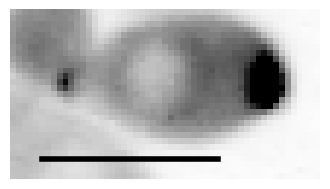

In [235]:
frames = max(times_max1, times_max2)
img = load(file)
im_array = Float64.(img) * 65535

fig, ax = subplots(figsize=(4,4))
sblen = 6.15*5
plot(range(5,5+sblen), ones(Int(round(sblen))).*25, color="black", linewidth=4) #5um scalebar
imshow(mean(im_array[:,:,frames], dims=(3)), cmap="Greys", clim=(100,300))
ax.set_axis_off()
savefig("../figures/3xGB_heatmap_pak1_m12c8.svg", transparent=true)
display(gcf())
# 6.15 px per micron

In [96]:
dir_wt = "../data/2024_09_26-3XGBwt/2patch/"
cov_threshold = 0.3
files_wt = readdir(dir_wt)
n = 0
for f in files_wt
    masks = mask_site("$dir_wt$f", cov_threshold, n_sites=2)
    im_size = length(masks[:,1,1,1])*length(masks[1,:,1,1])
    m1 = masks[:,:,:,1]
    m2 = masks[:,:,:,2]
    q1 = maximum(m1, dims=(1,2))[1,1,:]
    q2 = maximum(m2, dims=(1,2))[1,1,:]
    times_max1 = crop_times(q1, 15*(60/interval), time_threshold)
    times_max2 = crop_times(q2, 15*(60/interval), time_threshold)
    crop1 = q1[max(times_max1, times_max2)]
    crop2 = q2[max(times_max1, times_max2)]
    
    cell = replace(f,".tif" => "")
    fig, ax = subplots(figsize=(2.5,0.5))
    ax.plot(crop2, linewidth=2, color="C0")
    ax.plot(crop1, linewidth=2, color="C1")
    ax.tick_params(left = false, right = false , labelleft = false, labelbottom = false, bottom = false) 
    savefig("../figures/naked_2patch_wt/$(cell).svg", transparent=true)
end

.....

/home/dinosaur/.julia/packages/PythonCall/Nr75f/src/JlWrap/any.jl:258: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  return self._jl_callmethod($(pyjl_methodnum(pyjlany_call)), args, kwargs)


In [100]:
dir_del = "../data/2024_09_26-3XGBpak1Del/2patch/"
cov_threshold = 0.3
files_del = readdir(dir_del)
n = 0
for f in files_del
    masks = mask_site("$dir_del$f", cov_threshold, n_sites=2)
    im_size = length(masks[:,1,1,1])*length(masks[1,:,1,1])
    m1 = masks[:,:,:,1]
    m2 = masks[:,:,:,2]
    q1 = maximum(m1, dims=(1,2))[1,1,:]
    q2 = maximum(m2, dims=(1,2))[1,1,:]
    times_max1 = crop_times(q1, 15*(60/interval), time_threshold)
    times_max2 = crop_times(q2, 15*(60/interval), time_threshold)
    crop1 = q1[max(times_max1, times_max2)]
    crop2 = q2[max(times_max1, times_max2)]
    cell = replace(f,".tif" => "")
    fig, ax = subplots(figsize=(2.5,0.5))
    ax.plot(crop2, linewidth=2, color="C6")
    ax.plot(crop1, linewidth=2, color="C8")
    ax.tick_params(left = false, right = false , labelleft = false, labelbottom = false, bottom = false) 
    savefig("../figures/naked_2patch_del/$(cell).svg", transparent=true)
end

......

In [243]:
dir_wt = "../data/2024_09_26-3XGBwt/2patch/"
cov_threshold = 0.3
files_wt = readdir(dir_wt)
all_cor = zeros(31, (length(files_wt)*2))
peaks_ac = zeros(length(files_wt)*2)
wt_diffs = zeros(length(files_wt))
wt_means = zeros(length(files_wt)*2)
t_cor = range(0,30)*(15/60)
n = 0
for f in files_wt
    masks = mask_site("$dir_wt$f", cov_threshold, n_sites=2)
    im_size = length(masks[:,1,1,1])*length(masks[1,:,1,1])
    m1 = masks[:,:,:,1]
    m2 = masks[:,:,:,2]
    q1 = maximum(m1, dims=(1,2))[1,1,:]
    q2 = maximum(m2, dims=(1,2))[1,1,:]
    times_max1 = crop_times(q1, 15*(60/interval), time_threshold)
    times_max2 = crop_times(q2, 15*(60/interval), time_threshold)
    crop1 = q1[max(times_max1, times_max2)]
    crop2 = q2[max(times_max1, times_max2)]
    cor1 = crosscor(crop1, crop1, 0:30)
    cor2 = crosscor(crop2, crop2, 0:30)
    all_cor[:,n+1] = cor1
    all_cor[:,n+2] = cor2
    n+=1
    if length(findlocalmaxima(cor1)) > 1
        mac = findlocalmaxima(cor1)[2]
        peaks_ac[n] = mac[1] * (15/60)
    end
    n+=1
    if length(findlocalmaxima(cor2)) > 1
        mac = findlocalmaxima(cor2)[2]
        peaks_ac[n] = mac[1] * (15/60)
    end
    wt_diffs[Int(n/2)] = abs(mean(crop1) - mean(crop2))
    wt_means[n-1:n] = [mean(crop1), mean(crop2)]
end

.....

In [244]:
dir_del = "../data/2024_09_26-3XGBpak1Del/2patch/"
cov_threshold = 0.4
files_del = readdir(dir_del)
plot(ylabel="Correlation", xlabel="Lag (minutes)",
    legend=:bottomright, size=(600,400))
all_cor = zeros(31, (length(files_del)*2))
peaks_ac = zeros(length(files_del)*2)
del_diffs = zeros(length(files_del))
del_means = zeros(length(files_del)*2)
t_cor = range(0,30)*(15/60)
n = 0
for f in files_del
    masks = mask_site("$dir_del$f", cov_threshold, n_sites=2)
    im_size = length(masks[:,1,1,1])*length(masks[1,:,1,1])
    m1 = masks[:,:,:,1]
    m2 = masks[:,:,:,2]
    q1 = maximum(m1, dims=(1,2))[1,1,:]
    q2 = maximum(m2, dims=(1,2))[1,1,:]
    times_max1 = crop_times(q1, 15*(60/interval), time_threshold)
    times_max2 = crop_times(q2, 15*(60/interval), time_threshold)
    crop1 = q1[max(times_max1, times_max2)]
    crop2 = q2[max(times_max1, times_max2)]
    cor1 = crosscor(crop1, crop1, 0:30)
    cor2 = crosscor(crop2, crop2, 0:30)
    all_cor[:,n+1] = cor1
    all_cor[:,n+2] = cor2
    n+=1
    if length(findlocalmaxima(cor1)) > 1
        mac = findlocalmaxima(cor1)[2]
        peaks_ac[n] = mac[1] * (15/60)
    end
    n+=1
    if length(findlocalmaxima(cor2)) > 1
        mac = findlocalmaxima(cor2)[2]
        peaks_ac[n] = mac[1] * (15/60)
    end
    del_diffs[Int(n/2)] = abs(mean(crop1) - mean(crop2))
    del_means[n-1:n] = [mean(crop1), mean(crop2)]
end

.......

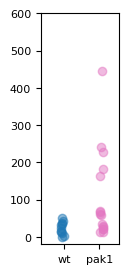

Python: None

In [287]:
fig, ax = subplots(figsize=(1,3))
ax.scatter(rand(length(wt_diffs)), wt_diffs, color="C0", alpha=0.5, label = "wt")
#ax.scatter(1, mean(wt_diffs), color="black", marker="_")
ax.scatter(10 .+ rand(length(del_diffs)),del_diffs, color="C6", alpha=0.5, label="pak1")
#ax.scatter(10, mean(del_diffs), color="black", marker="_")
ax.set_xticks([1,10],["wt","pak1"])
ax.set_xlim(-5,15)
ax.tick_params(labelsize=8)
ax.set_ylim(-20,600)
display(gcf())
savefig("../figures/scatter_diffs.svg", transparent=true)

In [285]:
MannWhitneyUTest(wt_diffs, del_diffs)

Exact Mann-Whitney U test
-------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          -37.3115

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0198

Details:
    number of observations in each group: [11, 16]
    Mann-Whitney-U statistic:             41.0
    rank sums:                            [107.0, 271.0]
    adjustment for ties:                  0.0


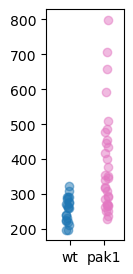

Python: None

In [261]:
fig, ax = subplots(figsize=(1,3))
ax.scatter(rand(length(wt_means)), wt_means, color="C0", alpha=0.5)
ax.scatter(10 .+ rand(length(del_means)),del_means, color="C6", alpha=0.5)
ax.set_xticks([1,10],["wt","pak1"])
ax.set_xlim(-5,15)
display(gcf())
savefig("../figures/scatter_means.svg", transparent=true)

In [97]:
using StatsPlots
using Random
scatter(rand(length(wt_diffs)),wt_diffs, x_ticks = ([.5, 10.5], ["wt","pak1"]),
    label=false, margin=5Plots.mm, dpi=600, size=(250,400), xlims=(-5,15), ylims=(-10,420), alpha=0.5, markersize=7, color=1)
scatter!(10 .+ rand(length(del_diffs)),del_diffs, label=false, alpha=0.5, markersize=7, yaxis="Difference in average patch intesntiy", color=7, grid=false)
savefig("../figures/2patch_intensity_diffs.png")

"/home/dinosaur/Lab/Polarity/proj/fig6-deletions/figures/2patch_intensity_diffs.png"

In [98]:
scatter(rand(length(wt_means)), wt_means, x_ticks = ([.5, 10.5], ["wt","pak1"]),
    label=false, margin=5Plots.mm, dpi=600, size=(250,400), xlims=(-5,15), alpha=0.5, markersize=7, color=1)
scatter!(10 .+ rand(length(del_means)),del_means, label=false, alpha=0.5, markersize=7, yaxis="Average patch intensity (15 min.)", color=7, grid=false)
savefig("../figures/2patch_avgIntesnity.png")

"/home/dinosaur/Lab/Polarity/proj/fig6-deletions/figures/2patch_avgIntesnity.png"